In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
dataset=pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

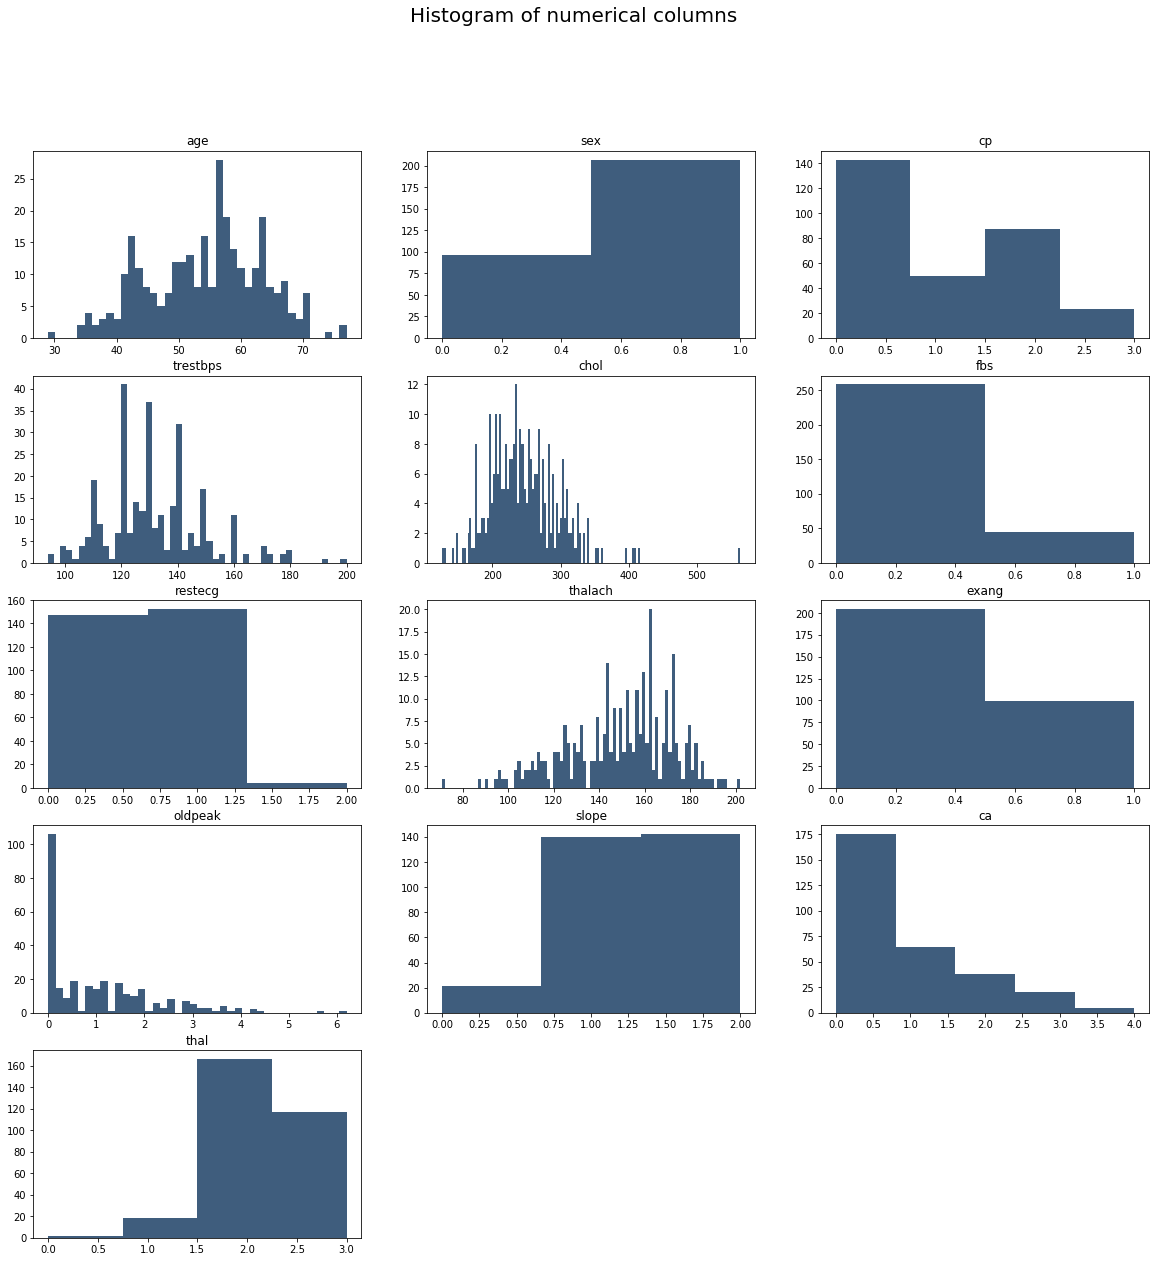

In [6]:
dataset2=dataset.drop(columns=['target'])

plt.figure(figsize=(20,20))
plt.suptitle('Histogram of numerical columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(5,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')

In [7]:
y=dataset['target']
X=dataset.drop(columns=['target'])

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
X_train.shape

(242, 13)

In [10]:
X_test.shape

(61, 13)

In [11]:
train_min=X_train.min()
train_range=X_train.max()-train_min
X_train=(X_train-train_min)/train_range

test_min=X_test.min()
test_range=X_test.max()-test_min
X_test=(X_test-test_min)/test_range



In [12]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_predict=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

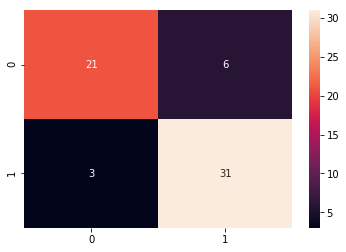

In [14]:
import seaborn as sns
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [15]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8524590163934426